In [30]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode,quote
import urllib.request
import requests
import json

import pandas as pd
import numpy as np
import datetime


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 

In [31]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [32]:
#필요하지 않은 부분 제외
seoul_vc = pd.read_csv('vc_result/vc_seoul.csv').iloc[:112,3:]
busan_vc = pd.read_csv('vc_result/vc_busan.csv').iloc[:112,3:]
daegu_vc = pd.read_csv('vc_result/vc_daegu.csv').iloc[:112,3:]

In [33]:
#날짜변경
date_lis = []
for date in seoul_vc['baseDate']:
    date_lis.append(int(date[:10].replace("-","")))

    
seoul_vc['baseDate'] = date_lis
busan_vc['baseDate'] = date_lis
daegu_vc['baseDate'] = date_lis

In [34]:
seoul_vc
busan_vc
daegu_vc

#9시 35분에 갱신 내용이 반영되므로, 8시부터 ~9시 35분까지 접종한 데이터는 

,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,20210311,12595,0,서울특별시,73827,0
1,20210312,10972,0,서울특별시,85864,0
2,20210313,9654,0,서울특별시,95996,0
3,20210314,1704,0,서울특별시,97777,0
4,20210315,900,0,서울특별시,98677,0
...,...,...,...,...,...,...
107,20210626,7635,22720,서울특별시,2821282,858697
108,20210627,2216,6655,서울특별시,2825885,865395
109,20210628,0,0,서울특별시,2825862,865395
110,20210629,3278,21853,서울특별시,2829341,887508


,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,20210311,3311,0,부산광역시,40045,0
1,20210312,2620,0,부산광역시,42779,0
2,20210313,2748,0,부산광역시,45611,0
3,20210314,187,0,부산광역시,45868,0
4,20210315,0,0,부산광역시,45868,0
...,...,...,...,...,...,...
107,20210626,2879,9589,부산광역시,1096862,304334
108,20210627,336,1119,부산광역시,1098007,305453
109,20210628,0,0,부산광역시,1098001,305453
110,20210629,700,9246,부산광역시,1098748,314830


,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,20210311,2310,0,대구광역시,25411,0
1,20210312,1834,0,대구광역시,27334,0
2,20210313,1435,0,대구광역시,28884,0
3,20210314,134,0,대구광역시,29018,0
4,20210315,10,0,대구광역시,29028,0
...,...,...,...,...,...,...
107,20210626,3196,5087,대구광역시,648172,192191
108,20210627,484,512,대구광역시,649524,192736
109,20210628,0,0,대구광역시,649515,192736
110,20210629,633,4402,대구광역시,650165,197191


In [35]:
seoul_vc['totalSecondCnt'][7]-seoul_vc['totalSecondCnt'][0]
busan_vc['totalSecondCnt'][7]-busan_vc['totalSecondCnt'][0]
daegu_vc['totalSecondCnt'][7]-daegu_vc['totalSecondCnt'][0]



0

0

0

In [36]:
# 지역별 주간 누적 (영화 기준 인덱스 수정)
## 서울
tmp_s = seoul_vc[
         (seoul_vc['baseDate']==20210318) | 
         (seoul_vc['baseDate']==20210325) |
         (seoul_vc['baseDate']==20210401) |
         (seoul_vc['baseDate']==20210408) | 
         (seoul_vc['baseDate']==20210415) |
         (seoul_vc['baseDate']==20210422) | 
         (seoul_vc['baseDate']==20210429) |
         (seoul_vc['baseDate']==20210506) |
         (seoul_vc['baseDate']==20210513) | 
         (seoul_vc['baseDate']==20210520) |
         (seoul_vc['baseDate']==20210527) |
         (seoul_vc['baseDate']==20210603) |
         (seoul_vc['baseDate']==20210610) |
         (seoul_vc['baseDate']==20210617) | 
         (seoul_vc['baseDate']==20210624) |
         (seoul_vc['baseDate']==20210630) 
        ]

## 부산
tmp_b = busan_vc[
         (daegu_vc['baseDate']==20210318) | 
         (daegu_vc['baseDate']==20210325) |
         (daegu_vc['baseDate']==20210401) |
         (daegu_vc['baseDate']==20210408) | 
         (daegu_vc['baseDate']==20210415) |
         (daegu_vc['baseDate']==20210422) | 
         (daegu_vc['baseDate']==20210429) |
         (daegu_vc['baseDate']==20210506) |
         (daegu_vc['baseDate']==20210513) | 
         (daegu_vc['baseDate']==20210520) |
         (daegu_vc['baseDate']==20210527) |
         (daegu_vc['baseDate']==20210603) |
         (daegu_vc['baseDate']==20210610) |
         (daegu_vc['baseDate']==20210617) | 
         (daegu_vc['baseDate']==20210624) |
         (daegu_vc['baseDate']==20210630) 
        ]

tmp_d = daegu_vc[
         (daegu_vc['baseDate']==20210318) | 
         (daegu_vc['baseDate']==20210325) |
         (daegu_vc['baseDate']==20210401) |
         (daegu_vc['baseDate']==20210408) | 
         (daegu_vc['baseDate']==20210415) |
         (daegu_vc['baseDate']==20210422) | 
         (daegu_vc['baseDate']==20210429) |
         (daegu_vc['baseDate']==20210506) |
         (daegu_vc['baseDate']==20210513) | 
         (daegu_vc['baseDate']==20210520) |
         (daegu_vc['baseDate']==20210527) |
         (daegu_vc['baseDate']==20210603) |
         (daegu_vc['baseDate']==20210610) |
         (daegu_vc['baseDate']==20210617) | 
         (daegu_vc['baseDate']==20210624) |
         (daegu_vc['baseDate']==20210630) 
        ]

In [37]:
tmp_s = tmp_s.reset_index(drop=True)
tmp_b = tmp_b.reset_index(drop=True)
tmp_d = tmp_d.reset_index(drop=True)


In [38]:
#주간 접종자 수 계산
s_week_1 = [35709]
d_week_1 = [5729]
b_week_1 = [10943]
s_week_2 = [0]
d_week_2 = [0]
b_week_2 = [0]

for i in range(16):
    try:
        s_week_2.append(tmp_s['totalSecondCnt'][i+1]-tmp_s['totalSecondCnt'][i])
        b_week_2.append(tmp_b['totalSecondCnt'][i+1]-tmp_b['totalSecondCnt'][i])
        d_week_2.append(tmp_d['totalSecondCnt'][i+1]-tmp_d['totalSecondCnt'][i])
        s_week_1.append(tmp_s['totalFirstCnt'][i+1]-tmp_s['totalFirstCnt'][i])
        b_week_1.append(tmp_b['totalFirstCnt'][i+1]-tmp_b['totalFirstCnt'][i])
        d_week_1.append(tmp_d['totalFirstCnt'][i+1]-tmp_d['totalFirstCnt'][i])
        
    except:
        pass
    
    


In [39]:
#지역별 주간 누적 dict: 날짜,1차누계,2차
seoul_3_6 = {"일자":tmp_s['baseDate'].astype(str).values,
             "1차접종누계":tmp_s['totalFirstCnt'].values,
             "2차접종누계":tmp_s['totalSecondCnt'].values,
             "주간1차접종자수": np.array(s_week_1),
             "주간2차접종자수": np.array(s_week_2)
            }

busan_3_6 = {"일자":tmp_b['baseDate'].astype(str).values,
             "1차접종누계":tmp_b['totalFirstCnt'].values,
             "2차접종누계":tmp_b['totalSecondCnt'].values,
             "주간1차접종자수": np.array(b_week_1),
             "주간2차접종자수": np.array(b_week_2)
               }

daegu_3_6 = {"일자":tmp_d['baseDate'].astype(str).values,
             "1차접종누계":tmp_d['totalFirstCnt'].values,
             "2차접종누계":tmp_d['totalSecondCnt'].values,
             "주간1차접종자수": np.array(d_week_1),
             "주간2차접종자수": np.array(d_week_2)
}

In [40]:
seoul_3_6
busan_3_6
daegu_3_6

{'일자': array(['20210318', '20210325', '20210401', '20210408', '20210415',
        '20210422', '20210429', '20210506', '20210513', '20210520',
        '20210527', '20210603', '20210610', '20210617', '20210624',
        '20210630'], dtype=object),
 '1차접종누계': array([ 109536,  122249,  141584,  166563,  195071,  294555,  438269,
         563044,  600548,  616705,  650432, 1165736, 1746392, 2554809,
        2802006, 2833050], dtype=int64),
 '2차접종누계': array([     0,   1725,   6227,  12397,  13502,  13543,  27699,  47940,
        112781, 175445, 291118, 346936, 380200, 685532, 813666, 914519],
       dtype=int64),
 '주간1차접종자수': array([ 35709,  12713,  19335,  24979,  28508,  99484, 143714, 124775,
         37504,  16157,  33727, 515304, 580656, 808417, 247197,  31044],
       dtype=int64),
 '주간2차접종자수': array([     0,   1725,   4502,   6170,   1105,     41,  14156,  20241,
         64841,  62664, 115673,  55818,  33264, 305332, 128134, 100853],
       dtype=int64)}

{'일자': array(['20210318', '20210325', '20210401', '20210408', '20210415',
        '20210422', '20210429', '20210506', '20210513', '20210520',
        '20210527', '20210603', '20210610', '20210617', '20210624',
        '20210630'], dtype=object),
 '1차접종누계': array([  50988,   60664,   73571,   83895,   96082,  121702,  174943,
         223997,  231495,  233540,  254350,  470503,  713446,  996171,
        1089840, 1100426], dtype=int64),
 '2차접종누계': array([     0,     62,    245,   2388,   4161,   4161,   8592,  18249,
         32353,  60033, 118935, 132160, 141696, 230090, 285163, 326829],
       dtype=int64),
 '주간1차접종자수': array([ 10943,   9676,  12907,  10324,  12187,  25620,  53241,  49054,
          7498,   2045,  20810, 216153, 242943, 282725,  93669,  10586],
       dtype=int64),
 '주간2차접종자수': array([    0,    62,   183,  2143,  1773,     0,  4431,  9657, 14104,
        27680, 58902, 13225,  9536, 88394, 55073, 41666], dtype=int64)}

{'일자': array(['20210318', '20210325', '20210401', '20210408', '20210415',
        '20210422', '20210429', '20210506', '20210513', '20210520',
        '20210527', '20210603', '20210610', '20210617', '20210624',
        '20210630'], dtype=object),
 '1차접종누계': array([ 31140,  35268,  40298,  46922,  56430,  78721, 117794, 151913,
        157874, 158351, 167685, 274006, 402177, 582909, 641113, 651187],
       dtype=int64),
 '2차접종누계': array([     0,    217,    659,   1387,   2946,   2946,   5637,  13251,
         27705,  51465,  86997,  99038, 102403, 153267, 181795, 203101],
       dtype=int64),
 '주간1차접종자수': array([  5729,   4128,   5030,   6624,   9508,  22291,  39073,  34119,
          5961,    477,   9334, 106321, 128171, 180732,  58204,  10074],
       dtype=int64),
 '주간2차접종자수': array([    0,   217,   442,   728,  1559,     0,  2691,  7614, 14454,
        23760, 35532, 12041,  3365, 50864, 28528, 21306], dtype=int64)}

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '서울')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '일자')

Text(0, 0.5, '명')

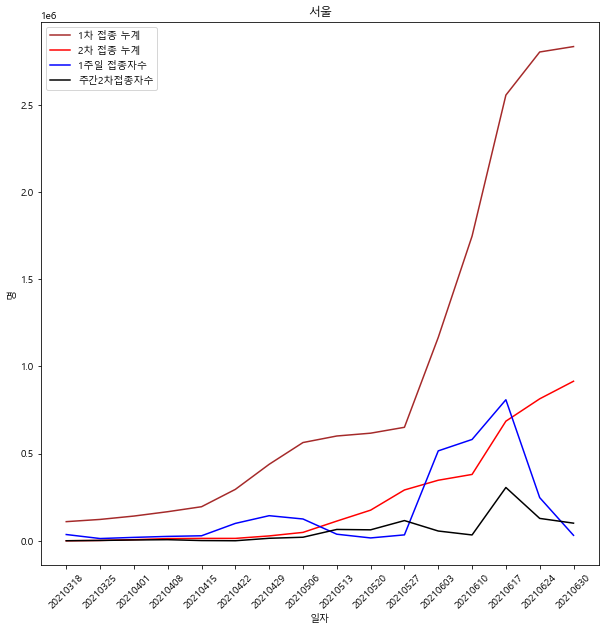

In [41]:
plt.figure(figsize=(10,10))

plt.plot(seoul_3_6['일자'], seoul_3_6['1차접종누계'], color='brown', label='1차 접종 누계')
plt.plot(seoul_3_6['일자'], seoul_3_6['2차접종누계'], color='red', label='2차 접종 누계')
plt.plot(seoul_3_6['일자'], seoul_3_6['주간1차접종자수'], color='blue', label='1주일 접종자수')
plt.plot(seoul_3_6['일자'], seoul_3_6['주간2차접종자수'], color='black', label='주간2차접종자수')


plt.title('서울')
plt.xticks(rotation=45)
plt.xlabel('일자')
plt.ylabel('명')
plt.legend(loc='best')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '부산')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '일자')

Text(0, 0.5, '명')

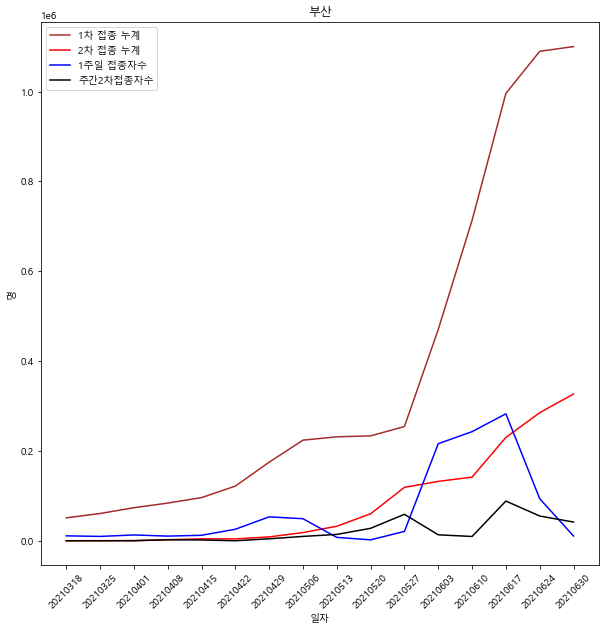

In [42]:
plt.figure(figsize=(10,10))

plt.plot(busan_3_6['일자'], busan_3_6['1차접종누계'], color='brown', label='1차 접종 누계')
plt.plot(busan_3_6['일자'], busan_3_6['2차접종누계'], color='red', label='2차 접종 누계')
plt.plot(busan_3_6['일자'], busan_3_6['주간1차접종자수'], color='blue', label='1주일 접종자수')
plt.plot(busan_3_6['일자'], busan_3_6['주간2차접종자수'], color='black', label='주간2차접종자수')


plt.title('부산')
plt.xticks(rotation=45)
plt.xlabel('일자')
plt.ylabel('명')
plt.legend(loc='best')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '대구')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '일자')

Text(0, 0.5, '명')

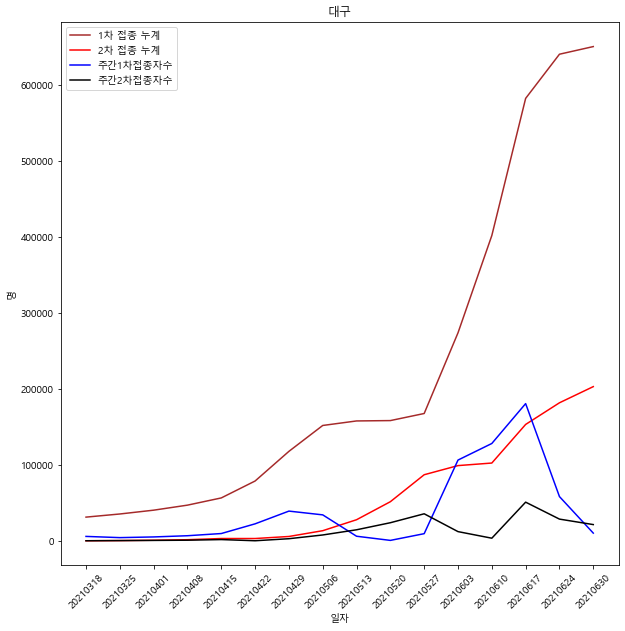

In [43]:
plt.figure(figsize=(10,10))

plt.plot(daegu_3_6['일자'], daegu_3_6['1차접종누계'], color='brown', label='1차 접종 누계')
plt.plot(daegu_3_6['일자'], daegu_3_6['2차접종누계'], color='red', label='2차 접종 누계')
plt.plot(daegu_3_6['일자'], daegu_3_6['주간1차접종자수'], color='blue', label='주간1차접종자수')
plt.plot(daegu_3_6['일자'], daegu_3_6['주간2차접종자수'], color='black', label='주간2차접종자수')

plt.title('대구')
plt.xticks(rotation=45)
plt.xlabel('일자')
plt.ylabel('명')
plt.legend(loc='best')

In [44]:
df_s = pd.DataFrame(seoul_3_6)
df_b = pd.DataFrame(busan_3_6)
df_d = pd.DataFrame(daegu_3_6)

In [45]:
df_s 
df_b
df_d

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,20210318,109536,0,35709,0
1,20210325,122249,1725,12713,1725
2,20210401,141584,6227,19335,4502
3,20210408,166563,12397,24979,6170
4,20210415,195071,13502,28508,1105
5,20210422,294555,13543,99484,41
6,20210429,438269,27699,143714,14156
7,20210506,563044,47940,124775,20241
8,20210513,600548,112781,37504,64841
9,20210520,616705,175445,16157,62664


,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,20210318,50988,0,10943,0
1,20210325,60664,62,9676,62
2,20210401,73571,245,12907,183
3,20210408,83895,2388,10324,2143
4,20210415,96082,4161,12187,1773
5,20210422,121702,4161,25620,0
6,20210429,174943,8592,53241,4431
7,20210506,223997,18249,49054,9657
8,20210513,231495,32353,7498,14104
9,20210520,233540,60033,2045,27680


,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,20210318,31140,0,5729,0
1,20210325,35268,217,4128,217
2,20210401,40298,659,5030,442
3,20210408,46922,1387,6624,728
4,20210415,56430,2946,9508,1559
5,20210422,78721,2946,22291,0
6,20210429,117794,5637,39073,2691
7,20210506,151913,13251,34119,7614
8,20210513,157874,27705,5961,14454
9,20210520,158351,51465,477,23760


In [46]:
df_s.to_csv('./vc_result/서울주간백신정보.csv')
df_b.to_csv('./vc_result/부산주간백신정보.csv')
df_d.to_csv('./vc_result/대구주간백신정보.csv')